# Neural Nets - Regression - Meteor Position

Rob Rappa
7/7/19

#Source - DataCamp - Deep Learning with Keras

In [74]:
#########################
# IMPORT
#########################

import math
import numpy as np
from numpy import genfromtxt
import pandas as pd
import random
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint

### Read Data

In [23]:
# x = time steps
# The data in the DC class wasn't loaded like this, but I figured it out

time_steps = np.linspace(-10,10,2000)

In [27]:
# y = position (2-D view of earth, imagine looking from Moon)
# I identified the data from the DC class, saved it to a CSV in the same folder as this notebook, and loaded it here

y_positions = genfromtxt('data_meteor.csv', delimiter=',')

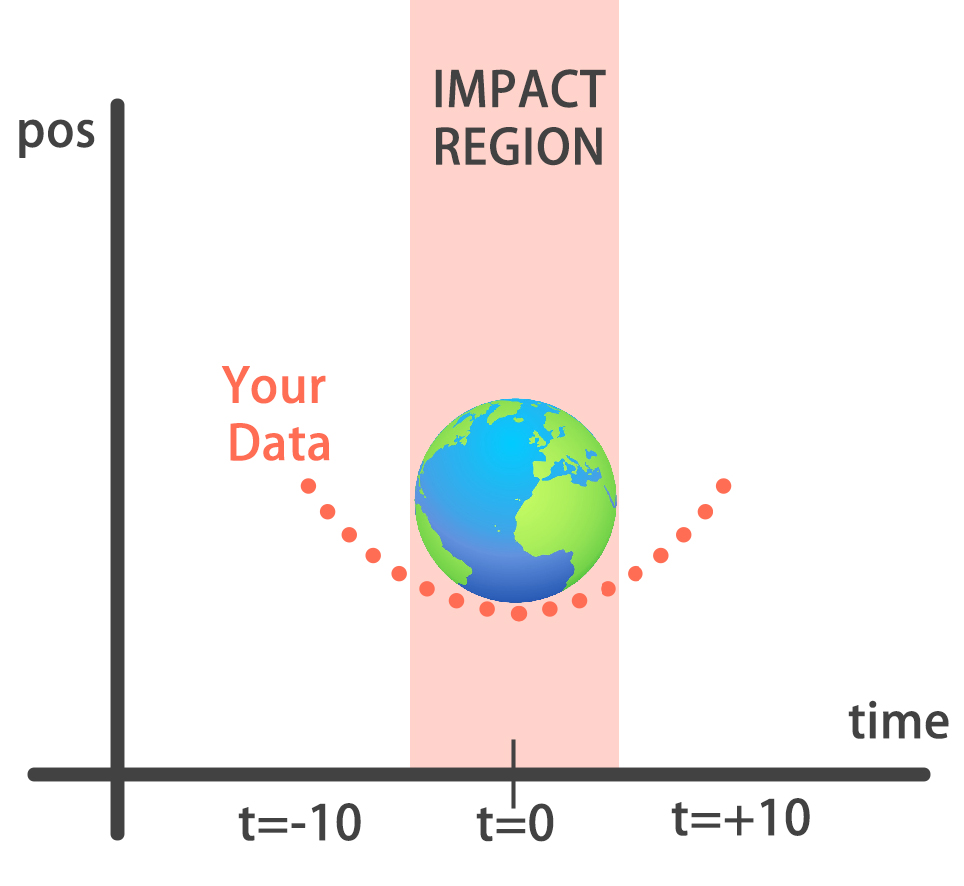


### Build Architecture

In [63]:
# Instantiate a Sequential model
model = Sequential()

# Add a Dense layer with 50 neurons and an input of 1 neuron
model.add(Dense(50, input_shape=(1,), activation='relu'))

# Add two Dense layers with 50 neurons and relu activation
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))

# End your model with a Dense layer and no activation
# No activation here since we want unbounded number
model.add(Dense(1))

# Compile your model
model.compile(optimizer='adam',loss='mse')

#Print a summary of the architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_30 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_31 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 51        
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


In [64]:
#Include Keras Callbacks

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_acc', patience=10)


# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_multiclassmultilabel_model.hdf5', save_best_only=True)

### Fit Model

In [69]:
print("Training started..., this can take a while:")

# Train your model on the training data for 200 epochs
history = model.fit(time_steps,y_positions, \
                    validation_split = 0.2, \
                    epochs=200, \
                   callbacks=[monitor_val_acc,modelCheckpoint])


Training started..., this can take a while:
Train on 1600 samples, validate on 400 samples
Epoch 1/200
1600/1600 [==============================] - 0s 270us/step - loss: 1010.2574 - val_loss: 1895.3832
Epoch 2/200
  32/1600 [..............................] - ETA: 0s - loss: 449.3093

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/callbacks.py:535: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1600/1600 [==============================] - 0s 83us/step - loss: 197.9384 - val_loss: 1260.2285
Epoch 3/200
1600/1600 [==============================] - 0s 63us/step - loss: 93.7176 - val_loss: 1093.0703
Epoch 4/200
1600/1600 [==============================] - 0s 62us/step - loss: 82.8953 - val_loss: 962.2617
Epoch 5/200
1600/1600 [==============================] - 0s 60us/step - loss: 68.9575 - val_loss: 856.2973
Epoch 6/200
1600/1600 [==============================] - 0s 68us/step - loss: 55.1101 - val_loss: 825.6396
Epoch 7/200
1600/1600 [==============================] - 0s 75us/step - loss: 41.4877 - val_loss: 618.0566
Epoch 8/200
1600/1600 [==============================] - 0s 87us/step - loss: 28.8552 - val_loss: 532.0720
Epoch 9/200
1600/1600 [==============================] - 0s 73us/step - loss: 17.6130 - val_loss: 472.7816
Epoch 10/200
1600/1600 [==============================] - 0s 64us/step - loss: 10.7768 - val_loss: 428.0636
Epoch 11/200
1600/1600 [=====================

1600/1600 [==============================] - 0s 50us/step - loss: 0.0527 - val_loss: 298.9113
Epoch 79/200
1600/1600 [==============================] - 0s 62us/step - loss: 0.0217 - val_loss: 296.8831
Epoch 80/200
1600/1600 [==============================] - 0s 48us/step - loss: 0.0072 - val_loss: 295.2350
Epoch 81/200
1600/1600 [==============================] - 0s 50us/step - loss: 0.0322 - val_loss: 293.8557
Epoch 82/200
1600/1600 [==============================] - 0s 49us/step - loss: 0.0469 - val_loss: 298.8319
Epoch 83/200
1600/1600 [==============================] - 0s 48us/step - loss: 0.0319 - val_loss: 304.4489
Epoch 84/200
1600/1600 [==============================] - 0s 48us/step - loss: 0.0192 - val_loss: 299.7667
Epoch 85/200
1600/1600 [==============================] - 0s 48us/step - loss: 0.0391 - val_loss: 298.5780
Epoch 86/200
1600/1600 [==============================] - 0s 54us/step - loss: 0.0192 - val_loss: 296.8009
Epoch 87/200
1600/1600 [==========================

1600/1600 [==============================] - 0s 49us/step - loss: 0.0122 - val_loss: 287.2435
Epoch 155/200
1600/1600 [==============================] - 0s 50us/step - loss: 0.0081 - val_loss: 287.1977
Epoch 156/200
1600/1600 [==============================] - 0s 50us/step - loss: 0.0070 - val_loss: 284.4486
Epoch 157/200
1600/1600 [==============================] - 0s 47us/step - loss: 0.0141 - val_loss: 286.0743
Epoch 158/200
1600/1600 [==============================] - 0s 48us/step - loss: 0.0030 - val_loss: 287.7054
Epoch 159/200
1600/1600 [==============================] - 0s 48us/step - loss: 0.0026 - val_loss: 286.3081
Epoch 160/200
1600/1600 [==============================] - 0s 49us/step - loss: 0.0121 - val_loss: 285.5238
Epoch 161/200
1600/1600 [==============================] - 0s 48us/step - loss: 0.0060 - val_loss: 284.8411
Epoch 162/200
1600/1600 [==============================] - 0s 50us/step - loss: 0.0103 - val_loss: 287.2435
Epoch 163/200
1600/1600 [=================

In [ ]:
# Evaluate your model 

print("Final loss value:",model.evaluate(time_steps,y_positions))

### Evaluate Model

In [70]:
# Visualization - Plot orbit function
## Note - to get this from source, type >plot_orbit??

def plot_orbit(model_preds):
  axeslim = int(len(model_preds)/2)
  plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1)**2,color="mediumslateblue")
  plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
  plt.axis([-40, 41, -5, 550])
  plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
  plt.title("Model orbit vs Scientist's Orbit")
  plt.show()

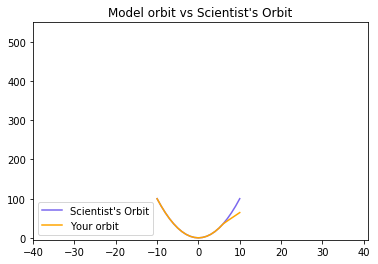

In [71]:
# Predict the twenty minutes orbit
twenty_min_orbit = model.predict(np.arange(-10, 11))

#Look at output
#twenty_min_orbit[0:20]

# Plot the twenty minute orbit 
plot_orbit(twenty_min_orbit)

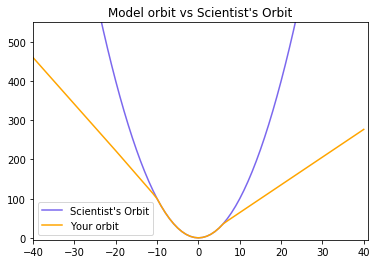

In [72]:
# Predict the eighty minute orbit
eighty_min_orbit = model.predict(np.arange(-40, 41))

# Plot the eighty minute orbit 
plot_orbit(eighty_min_orbit)

### Evaluate Different Activation Functions

In [79]:
#Function to create architecture

def get_model(act_function):
  model = Sequential()

  #Add in the hidden layer with activation
  if act_function == 'leaky_relu':
    model.add(Dense(50, input_shape=(1,)))
    model.add(LeakyReLU())
    model.add(Dense(50))
    model.add(LeakyReLU())
    model.add(Dense(50))
  else:
    model.add(Dense(50, input_shape=(1,), activation=act_function))
    model.add(Dense(50, activation=act_function))
    model.add(Dense(50, activation=act_function))
 
  #Output layer
  model.add(Dense(1))
    
  #Compile  
  model.compile(optimizer='adam', \
              loss='mse',\
              metrics=['accuracy'])
  return model

In [80]:
#Run model with different activations

# Set a seed
np.random.seed(27)

# Activation functions to try
activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']

# Loop over the activation functions
activation_results = {}

for act in activations:
  # Get a new model with the current activation
  model = get_model(act)
  # Fit the model
  history = model.fit(time_steps,y_positions,validation_split=0.2,epochs=20,verbose=0)
  activation_results[act] = history

In [87]:
activation_results['relu'].history

{'acc': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'loss': [1085.4049176025392,
  290.0433843231201,
  98.62248085021973,
  86.88539413452149,
  73.62878700256347,
  57.051590003967284,
  40.706091766357424,
  27.316659488677978,
  17.556385889053345,
  12.55613655090332,
  7.749241664409637,
  5.385227389335633,
  3.7026128393411635,
  2.6743252432346343,
  2.0198309791088103,
  1.561857379078865,
  1.3029010650515556,
  1.0909470480680465,
  0.7742791009694338,
  0.7136500050127507],
 'val_acc': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'val_loss': [1837.4410668945313,
  1223.5677709960937,
  986.3053015136719,
  813.712121887207,
  835.1112292480469,
  561.6977668762207,
  423.08096672058105,
  344.47636703491213,
  289.16916843414305,
  256.10643924713133,
  238.36618638038635,
  218.3160

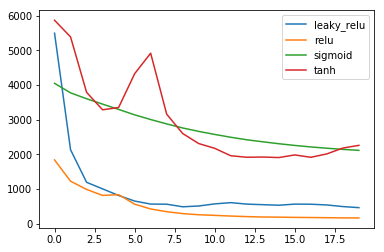

In [82]:
#Evaluate val_loss

# Create a dataframe from val_loss_per_function
val_loss= pd.DataFrame(val_loss_per_function)

# Call plot on the dataframe
val_loss.plot()
plt.show()


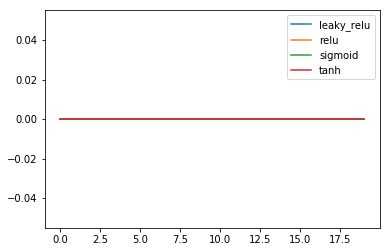

In [83]:
#Evaluate val_acc

# Create a dataframe from val_acc_per_function
val_acc = pd.DataFrame(val_acc_per_function)

# Call plot on the dataframe
val_acc.plot()
plt.show()